In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy.optimize import curve_fit

import h5py
import tqdm

In [32]:
f = h5py.File('/data/xebra/processed/20180828_1630.hdf5','r')

In [33]:
peaks = f['Peak']

In [41]:
which = 'Interaction'
num = 159
for n,v in zip(f[which].dtype.names, f[which][num]):
    print(n,v)

Event 208
Interaction 3
drift_time 2170.0
r_correction 0.0
s1 2
s1_area_correction 1.0
s1_area_fraction_top_probability nan
s1_pattern_fit nan
s1_pattern_fit_hits nan
s1_saturation_correction 1.0
s1_spatial_correction 1.0
s2 26
s2_area_correction 1.0
s2_lifetime_correction 1.0
x 2.10449
xy_posrec_algorithm b'PosRecWeightedSum'
xy_posrec_goodness_of_fit nan
xy_posrec_ndf nan
y 0.28255
z -0.1005
z_correction 0.0


In [4]:
for k in f.keys():
    print('%s: %i' % (k, len(f[k])))
    for i,n in enumerate(f[k].dtype.names):
        print('\t%s: %s' % (n, f[k].dtype[i]))
    print()

Event: 14898
	Event: int64
	block_id: int64
	dataset_name: |S32
	event_number: int64
	n_interactions: int64
	interactions_start: int64
	is_channel_suspicious: ('?', (8,))
	lone_hits_per_channel: ('<i2', (8,))
	lone_hits_per_channel_before: ('<i2', (8,))
	n_channels: int64
	n_hits_rejected: ('<i2', (8,))
	n_pulses: int64
	n_pulses_per_channel: ('<i2', (8,))
	noise_pulses_in: ('<i2', (8,))
	n_peaks: int64
	peaks_start: int64
	sample_duration: int64
	start_time: int64
	stop_time: int64

Interaction: 23892
	Event: int64
	Interaction: int64
	drift_time: float32
	r_correction: float32
	s1: int64
	s1_area_correction: float32
	s1_area_fraction_top_probability: float32
	s1_pattern_fit: float32
	s1_pattern_fit_hits: float32
	s1_saturation_correction: float32
	s1_spatial_correction: float32
	s2: int64
	s2_area_correction: float32
	s2_lifetime_correction: float32
	x: float32
	xy_posrec_algorithm: |S32
	xy_posrec_goodness_of_fit: float32
	xy_posrec_ndf: float32
	y: float32
	z: float32
	z_correction

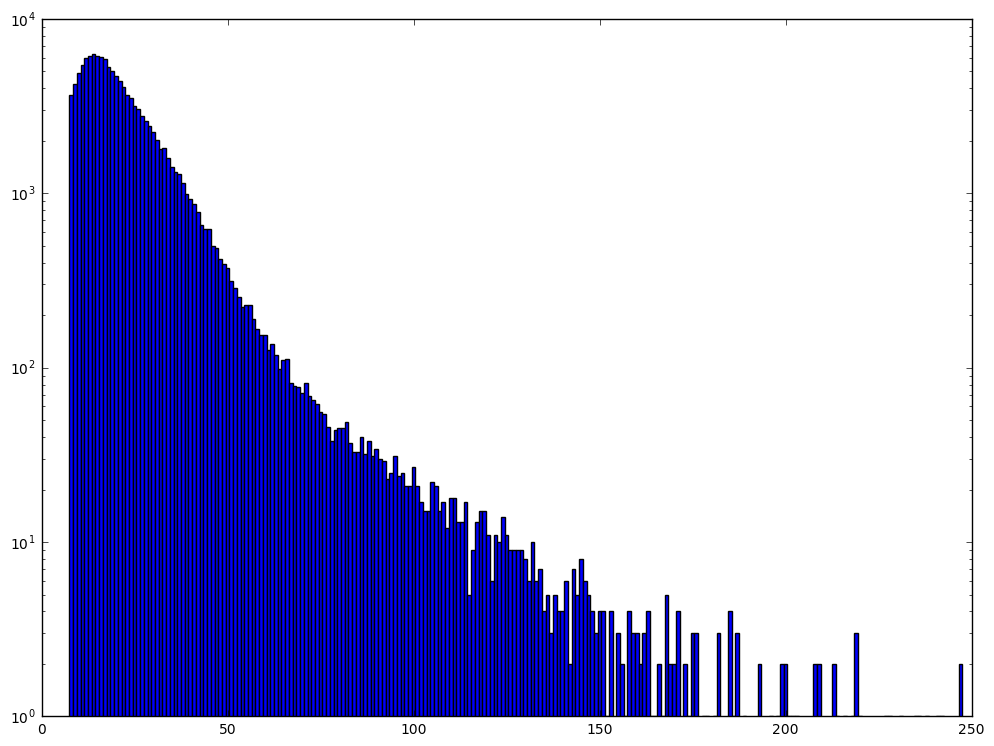

In [34]:
plt.figure(figsize=(12,9))
plt.hist(f['Event']['n_pulses'], bins=np.arange(-0.5,250.5,1))
plt.yscale('log')
plt.xlim(0,)
plt.show()

In [35]:
bins_y = np.logspace(0.5,4.5,100)
bins_x = np.logspace(0, 6, 100)
counts, _, _ = np.histogram2d(peaks['area'], peaks['range_area_decile'][:,5], bins=(bins_x, bins_y))

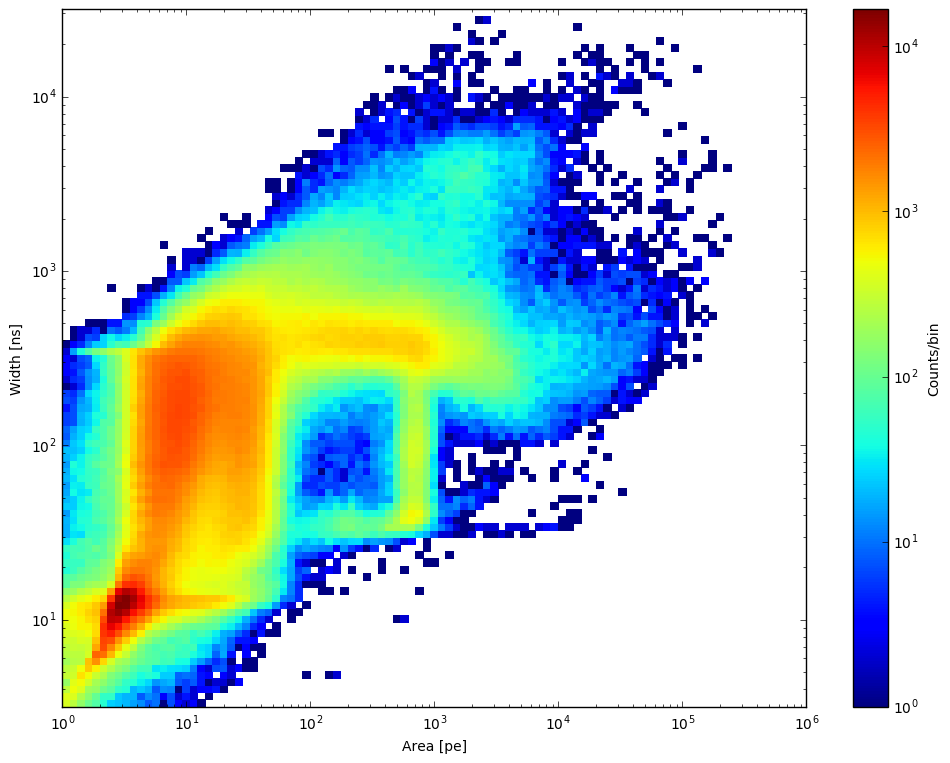

In [36]:
fig, ax = plt.subplots(figsize=(12,9))

im = ax.pcolormesh(bins_x, bins_y, counts.T, norm=mpl.colors.LogNorm())
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Width [ns]')
ax.set_xlabel('Area [pe]')

plt.colorbar(im, ax=ax, label='Counts/bin')
plt.ylim(bins_y[0], bins_y[-1])
plt.xlim(bins_x[0], bins_x[-1])
#plt.savefig('width_area.png',bbox_inches='tight')
plt.show()